In [111]:
from langgraph.graph import StateGraph, START, END
import random
from typing import TypedDict, List

In [112]:
#implementing binary search to the target between lower_limit and upper_limit
class AgentState(TypedDict):
    lower_limit : int
    upper_limit : int
    mid : int
    target : int
    counter : int
    guesses : list
    msg : str

In [113]:
def initial(state: AgentState) -> AgentState:
    if state["upper_limit"] < state["lower_limit"]:
        state["upper_limit"], state["lower_limit"] = state["lower_limit"], state["upper_limit"]
    #state["target"] = random.randint(state["lower_limit"], state["upper_limit"])
    state["counter"] = 0
    return state

def binary_search_lower(state: AgentState) -> AgentState:
    state["upper_limit"] = state["mid"]-1
    return state

def binary_search_upper(state: AgentState) -> AgentState:
    state["lower_limit"] = state["mid"]+1
    return state

def route(state: AgentState) -> AgentState:
    print(f"current lower_limit : {state["lower_limit"]}, upper_limit : {state["upper_limit"]}")
    state["mid"] = (state["lower_limit"] + state["upper_limit"])//2
    if state["mid"] == state["target"]:
        state["msg"] += f"\nthe target {state["target"]} has been found at {state["counter"]}th guess\nThe guessed numbers are {state["guesses"]}"
    state["guesses"].append(state["mid"])
    state["counter"] += 1
    return state

def decision(state: AgentState) -> AgentState:
    if  state["target"] < state["lower_limit"] or state["target"] > state["upper_limit"] :
        print("invalid target")
        return "invalid"
    if state["mid"] == state["target"]:
        return "found"
    if (state["lower_limit"] > state["upper_limit"]):
        state["msg"] += f"\nwe cannot find the target due to number of guesses exceeded 7\nThe guessed numbers are {state["guesses"]}"
        return "exit"
    if state["target"] < state["mid"]:
        return "lower"
    if state["target"] > state["mid"]:
        return "upper"

In [114]:
graph = StateGraph(AgentState)

graph.add_node("init", initial)
graph.add_node("low", binary_search_lower)
graph.add_node("up", binary_search_upper)
graph.add_node("router", route)

graph.add_edge(START, "init")
graph.add_edge("init", "router")

graph.add_conditional_edges(
    "router",
    decision,
    {
        "found" : END,
        "exit" : END,
        "lower" : "low",
        "upper" : "up",
        "invalid": END
    }
)

graph.add_edge("low", "router")
graph.add_edge("up", "router")


app = graph.compile()

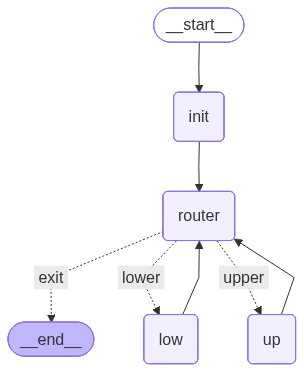

In [115]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [116]:
app.invoke({"lower_limit":96, "upper_limit":100000, "mid":0, "guesses":[], "counter":0, "msg":"", "target":-847})

current lower_limit : 96, upper_limit : 100000
invalid target


{'lower_limit': 96,
 'upper_limit': 100000,
 'mid': 50048,
 'target': -847,
 'counter': 1,
 'guesses': [50048],
 'msg': ''}